In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image
from zipfile import ZipFile 

In [2]:
# importing libraries for Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
test_dir="D:/programming/kaggle/cats_vs_dogs/dataset/test_set"
train_dir="D:/programming/kaggle/cats_vs_dogs/dataset/training_set"

train_dir_cats = train_dir + '/cats'
train_dir_dogs = train_dir + '/dogs'
test_dir_cats = test_dir + '/cats'
test_dir_dogs = test_dir + '/dogs'

In [4]:
print('number of cats training images - ',len(os.listdir(train_dir_cats)))
print('number of dogs training images - ',len(os.listdir(train_dir_dogs)))
print('number of cats testing images - ',len(os.listdir(test_dir_cats)))
print('number of dogs testing images - ',len(os.listdir(test_dir_dogs)))

number of cats training images -  4000
number of dogs training images -  4000
number of cats testing images -  1000
number of dogs testing images -  1000


In [5]:
data_generator = ImageDataGenerator(rescale = 1.0/255.0, zoom_range = 0.2)

In [11]:
batch_size = 32
training_data = data_generator.flow_from_directory(directory = train_dir,
                                                   target_size = (224, 224),
                                                   batch_size = batch_size,
                                                   class_mode = 'binary')
testing_data = data_generator.flow_from_directory(directory = test_dir,
                                                  target_size = (224, 224),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [7]:
from tensorflow.python.keras.applications import ResNet50

resnet_weights_path = 'D:/programming/kaggle/_transferLearning/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

model = Sequential()
model.add(ResNet50(include_top=False, pooling='max', weights=resnet_weights_path))
model.add(Dense(units = len(set(training_data.classes)), activation='softmax'))

# The value below is either True or False.  If you choose the wrong answer, your modeling results
# won't be very good.  Recall whether the first layer should be trained/changed or not.
model.layers[0].trainable = False

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [12]:
fitted_model = model.fit_generator(training_data,
                        steps_per_epoch = 4000,
                        epochs = 2,
                        validation_data = testing_data,
                        validation_steps = 1000)

Epoch 1/2
250/250 [==============================] - 2216s 9s/step - loss: 0.3680 - acc: 0.9450 - val_loss: 4.1688 - val_acc: 0.5115
Epoch 2/2
250/250 [==============================] - 2157s 9s/step - loss: 0.2890 - acc: 0.9556 - val_loss: 2.8508 - val_acc: 0.6715


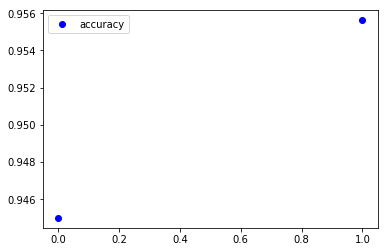

In [13]:
# plotting accuracy and validation accuracy
accuracy = fitted_model.history['acc']
plt.plot(range(len(accuracy)), accuracy, 'bo', label = 'accuracy')
plt.legend()

In [14]:
# testing the model
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(x = test_image)
    print(result)
    if result[0][0]  == 1:
        prediction = 'Dog'
    else:
        prediction = 'Cat'
    return prediction

In [15]:
print(testing_image(test_dir + '/cats/cat.4003.jpg'))

[[0. 1.]]
Cat
